# 1. Introduction

=======================================================================================================================================================================


Name : Ardiansyah Putra Mahadika

Batch : BSD - 006

This program is developed to analyze the weather conditions of a region and classify them as snowy or not snowy. The dataset used comes from the Kaggle weather classification dataset. The metric score used is accuracy to determine which weather types are snowy and which are not snowy. It will be deployed using Streamlit on Hugging Face.

=======================================================================================================================================================================

## Background

Cold temperatures can affect a person's body condition. Cold allergies or cold urticaria have symptoms ranging from mild to severe, which can endanger health. This allergic condition is often experienced by adults. Cold allergies are sometimes ignored by sufferers, but if not treated immediately, cold allergies can cause anaphylactic shock, such as a drastic drop in blood pressure, difficulty breathing, and even fainting. The administration of leukotriene antagonists is usually specifically for cold allergies accompanied by symptoms of shortness of breath. This medication works by inhibiting leukotriene substances, which are particles that can cause inflammation and obstruct airflow. This condition causes sufferers of cold allergies to experience shortness of breath. Therefore, the sale of leukotriene antagonist drugs will be more appropriate in snowy weather conditions.

## Problem Statement 

The goal is to develop a classification model to predict whether a given weather condition is snowy or not snowy based on the provided dataset. The objective is to achieve a model accuracy of at least 90% on the test data set. This will be accomplished by employing appropriate data preprocessing, feature engineering, and machine learning algorithms within a 4-day effective working period. The model will play a crucial role in identifying snowy conditions, which is essential for managing cold allergies and associated people's health. The entire model development process, including data preprocessing, model training, evaluation, and validation, will be completed within this specified timeframe.

# 2. Import Required Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Feature Engineering
from sklearn.model_selection import train_test_split, GridSearchCV
from feature_engine.outliers import Winsorizer
from phik import phik_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTENC



# Import Model
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score


# Save Model 
import pickle

import warnings
warnings.filterwarnings("ignore")

/Users/ardiansyahputra/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


# 3. Data Loading

## Retrieve dataset from .csv file

In [2]:
df_ori = pd.read_csv('weather_classification_data.csv')

In [3]:
# Checking datatype information of dataset
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


## Column Explanation

| Column | Description | Datatype | Is Correct Datatype |
| :---------------------: | :---------------------------------: | :----------------------------: | :------------: |
| Temperature | The temperature in degrees Celsius, ranging from extreme cold to extreme heat | float64 | Yes | 
| Humidity | The humidity percentage, including values above 100% to introduce outliers | int64 | Yes | 
| Wind Speed | The wind speed in kilometers per hour, with a range including unrealistically high values | float64 | Yes | 
| Precipitation | The precipitation percentage, including outlier values. | float64 | Yes | 
| Cloud Cover |  The cloud cover description | object | Yes | 
| Atmospheric Pressure | The atmospheric pressure in hPa, covering a wide range | float64 | Yes | 
| UV Index | The UV index, indicating the strength of ultraviolet radiation | int64 | Yes | 
| Season | The season during which the data was recorded | object | Yes |
| Visibility |The visibility in kilometers, including very low or very high values | float64 | Yes |
| Location | The type of location where the data was recorded | object | Yes |
| Weather Type | The target variable for classification, indicating the weather type | object | Yes |


### Statement

From the columns explanation above, the datatype on each feature is correctly cast 

## Column Checking

In [4]:
# Checking dimensionality dataset
df_ori.shape

(13200, 11)

In [5]:
# Checking first 5 data of the dataset
df_ori.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [6]:
# Checking last 5 data of the dataset
df_ori.tail()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy
13199,-5.0,38,0.0,92.0,overcast,1015.37,5,Autumn,10.0,mountain,Rainy


In [7]:
# Checking correlation on each numerical column
df_ori.select_dtypes(include=np.number).corr()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
Temperature,1.000000,-0.207969,-0.070022,-0.287206,0.209188,0.374773,0.250751
Humidity,-0.207969,1.000000,0.406079,0.638631,-0.120653,-0.342694,-0.479969
Wind Speed,-0.070022,0.406079,1.000000,0.443770,-0.077757,-0.068147,-0.311828
Precipitation (%),-0.287206,0.638631,0.443770,1.000000,-0.177444,-0.291601,-0.457444
Atmospheric Pressure,0.209188,-0.120653,-0.077757,-0.177444,1.000000,0.154128,0.120182
UV Index,0.374773,-0.342694,-0.068147,-0.291601,0.154128,1.000000,0.362922
Visibility (km),0.250751,-0.479969,-0.311828,-0.457444,0.120182,0.362922,1.000000


In [8]:
# checking duplicated data
df_ori.duplicated().any()

False

In [9]:
# checking missing value
df_ori.isna().any()

Temperature             False
Humidity                False
Wind Speed              False
Precipitation (%)       False
Cloud Cover             False
Atmospheric Pressure    False
UV Index                False
Season                  False
Visibility (km)         False
Location                False
Weather Type            False
dtype: bool

In [10]:
# backup original dataset
df = df_ori.copy(deep=True)

## Column Cleaning

In [11]:
# convert into lower case
df.columns = df.columns.str.lower()
df.columns

Index(['temperature', 'humidity', 'wind speed', 'precipitation (%)',
       'cloud cover', 'atmospheric pressure', 'uv index', 'season',
       'visibility (km)', 'location', 'weather type'],
      dtype='object')

In [12]:
# removing annotations data
df.columns = df.columns.str.replace(r'\s*\(.*\)\s*', '', regex=True)

In [13]:
# replacing space with '_'
df.columns = df.columns.str.replace(' ', '_')
df.columns

Index(['temperature', 'humidity', 'wind_speed', 'precipitation', 'cloud_cover',
       'atmospheric_pressure', 'uv_index', 'season', 'visibility', 'location',
       'weather_type'],
      dtype='object')

In [14]:
df['weather_type'].unique()


array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

## Create Target Value

In [15]:
df['is_snowy'] = df['weather_type'].apply(lambda x: 'Yes' if x == 'Snowy' else 'No')
df

,temperature,humidity,wind_speed,precipitation,cloud_cover,atmospheric_pressure,uv_index,season,visibility,location,weather_type,is_snowy
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy,No
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy,No
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny,No
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny,No
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy,No
...,...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy,No
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy,Yes
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy,No
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy,Yes


In [16]:
df.columns

Index(['temperature', 'humidity', 'wind_speed', 'precipitation', 'cloud_cover',
       'atmospheric_pressure', 'uv_index', 'season', 'visibility', 'location',
       'weather_type', 'is_snowy'],
      dtype='object')

# 4. Data Exploratory Analysis

## Data Distribution by Target Column

In [17]:
df_group_target = df.groupby('is_snowy').size().reset_index().rename(columns={0:'count'})
df_group_target

,is_snowy,count
0,No,9900
1,Yes,3300


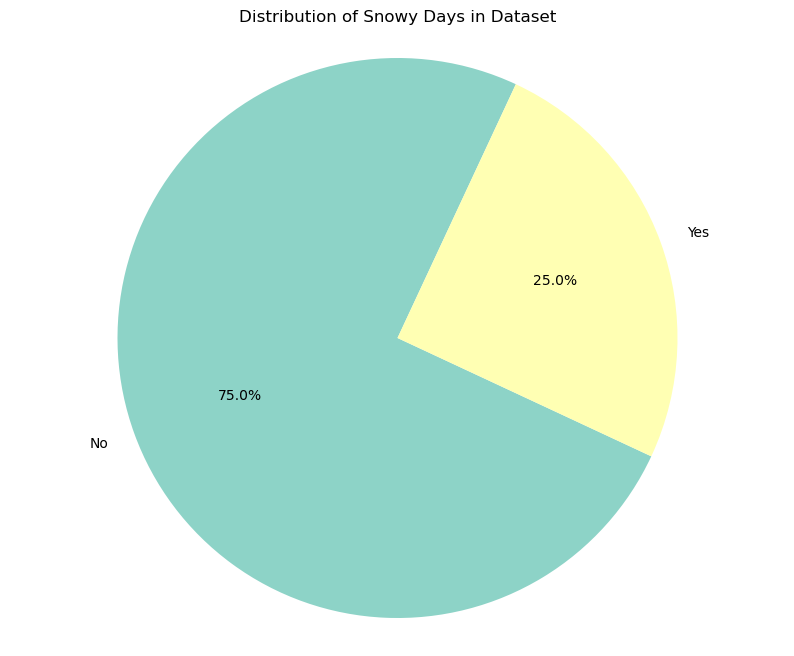

In [18]:
labels = df_group_target['is_snowy']
sizes = df_group_target['count']

# Define the explode values to create the effect

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=65, colors=plt.cm.Set3.colors)
plt.title('Distribution of Snowy Days in Dataset')
plt.axis('equal')  
plt.show()

__Insight:__

The imbalance in data distribution could affect the accuracy of weather classification. It shows that the data in the dataset is imbalanced, as the percentage between snowy and non-snowy regions has a significant difference in the amount of data. 

## UV-Index Distribution by Season

__The intensity of ultraviolet radiation from the sun reaching the Earth's surface. High UV exposure can cause damage to human skin, such as sunburn, premature aging, and an increased risk of skin cancer.__

In [19]:
uv_index_avg = df.groupby('season')['uv_index'].mean().reset_index()
uv_index_avg

,season,uv_index
0,Autumn,4.777200
1,Spring,4.789069
2,Summer,4.853933
3,Winter,2.922460


__Insight:__ 

Although winter sees lower average UV index levels, there remains a need for cold allergy medications that cater to symptoms exacerbated by cold weather. Emphasizing formulations that soothe respiratory discomfort and nasal congestion can address specific winter-related allergic reactions

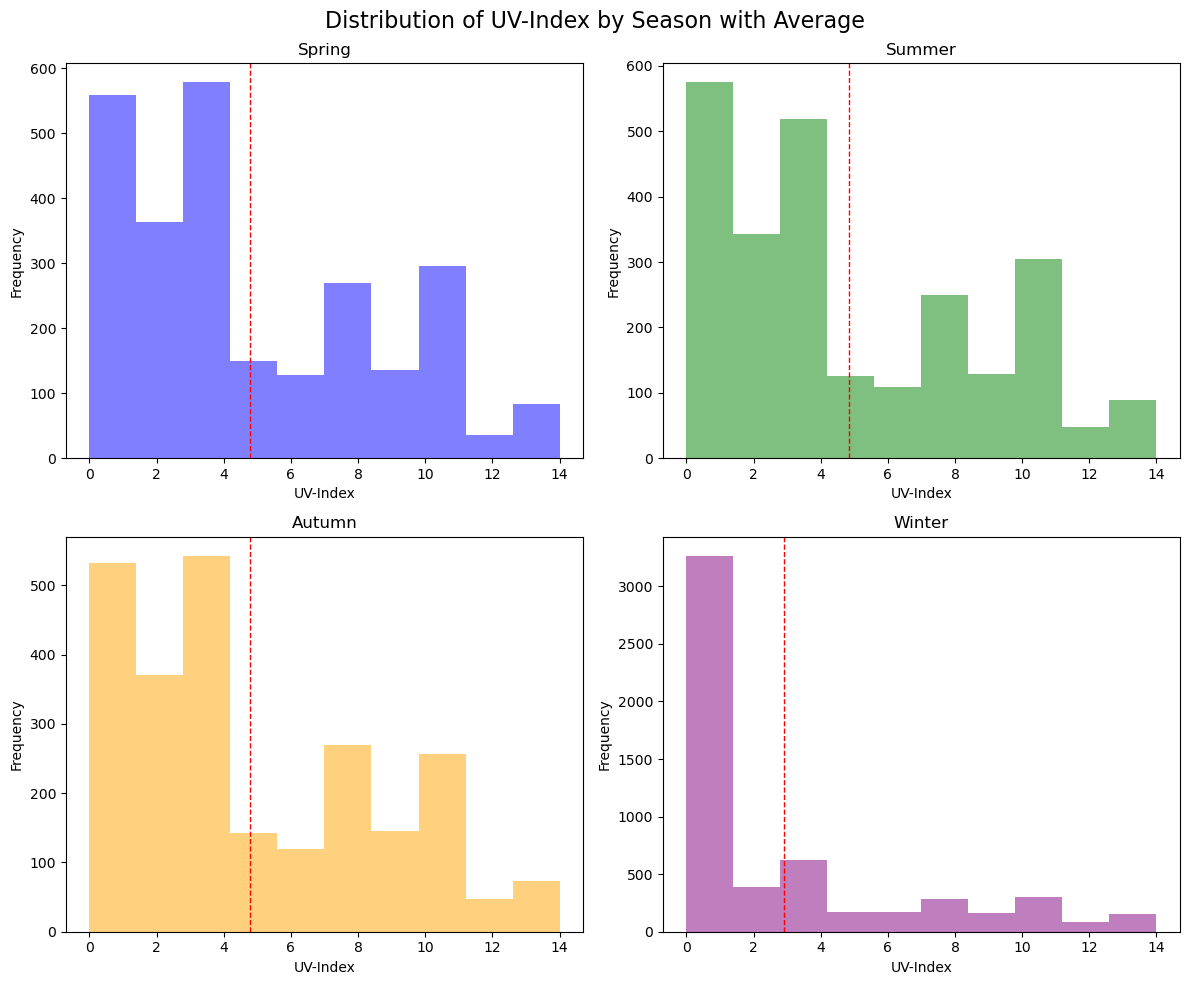

In [20]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Plot untuk musim Spring
axs[0, 0].hist(df[df['season'] == 'Spring']['uv_index'], bins=10, alpha=0.5, color='b')
axs[0, 0].axvline(uv_index_avg[uv_index_avg['season'] == 'Spring']['uv_index'].values[0], color='r', linestyle='dashed', linewidth=1)
axs[0, 0].set_title('Spring')
axs[0, 0].set_xlabel('UV-Index')
axs[0, 0].set_ylabel('Frequency')

# Plot untuk musim Summer
axs[0, 1].hist(df[df['season'] == 'Summer']['uv_index'], bins=10, alpha=0.5, color='g')
axs[0, 1].axvline(uv_index_avg[uv_index_avg['season'] == 'Summer']['uv_index'].values[0], color='r', linestyle='dashed', linewidth=1)
axs[0, 1].set_title('Summer')
axs[0, 1].set_xlabel('UV-Index')
axs[0, 1].set_ylabel('Frequency')

# Plot untuk musim Autumn
axs[1, 0].hist(df[df['season'] == 'Autumn']['uv_index'], bins=10, alpha=0.5, color='orange')
axs[1, 0].axvline(uv_index_avg[uv_index_avg['season'] == 'Autumn']['uv_index'].values[0], color='r', linestyle='dashed', linewidth=1)
axs[1, 0].set_title('Autumn')
axs[1, 0].set_xlabel('UV-Index')
axs[1, 0].set_ylabel('Frequency')

# Plot untuk musim Winter
axs[1, 1].hist(df[df['season'] == 'Winter']['uv_index'], bins=10, alpha=0.5, color='purple')
axs[1, 1].axvline(uv_index_avg[uv_index_avg['season'] == 'Winter']['uv_index'].values[0], color='r', linestyle='dashed', linewidth=1)
axs[1, 1].set_title('Winter')
axs[1, 1].set_xlabel('UV-Index')
axs[1, 1].set_ylabel('Frequency')

# Menampilkan plot
plt.suptitle('Distribution of UV-Index by Season with Average', fontsize=16)
plt.tight_layout()
plt.show()

__Insight:__

During the winter season, there is still has high levels of UV index, which means that UV levels can potentially become high at any time, posing risks to people's skin. It's important for people to protect their skin by using sunscreen and limiting sun exposure during periods of high UV index, even in colder months when UV levels may not be as visibly intense as in summer.

## Atmospheric Pressure Distribution by Season

__When atmospheric pressure drops, it often indicates the presence of colder or cloudier weather systems that can lead to snowfall. In areas with low atmospheric pressure, air tends to rise, cooling the atmosphere and forming clouds that can result in snow. Therefore, monitoring atmospheric pressure can provide clues about the likelihood of snow in a area.__

In [21]:
ap_avg = df.groupby('season')['atmospheric_pressure'].mean().reset_index()
ap_avg

,season,atmospheric_pressure
0,Autumn,1010.891012
1,Spring,1010.662360
2,Summer,1009.609563
3,Winter,999.652916


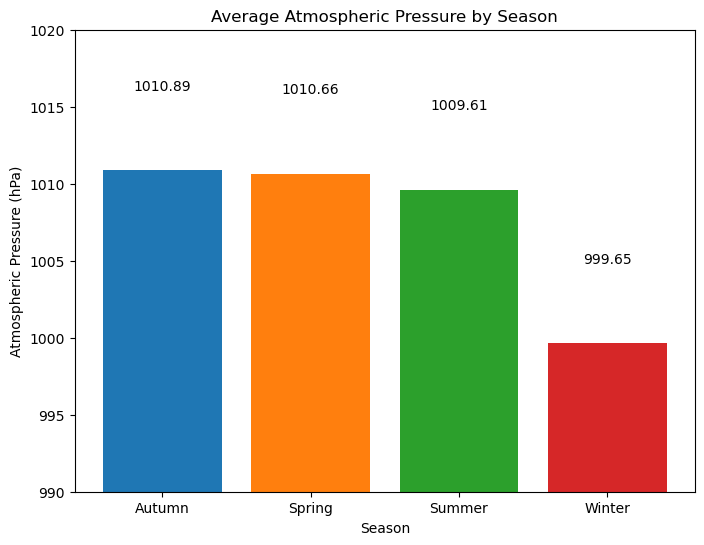

In [22]:
plt.figure(figsize=(8, 6))
bars = plt.bar(ap_avg['season'], ap_avg['atmospheric_pressure'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.xlabel('Season')
plt.ylabel('Atmospheric Pressure (hPa)')
plt.title('Average Atmospheric Pressure by Season')
plt.ylim(990, 1020) 

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 5,
             round(bar.get_height(), 2), ha='center', va='bottom')

plt.show()

__Insight:__

Winter season has lowest average of atmospheric pressure 999.65. This low atmospheric pressure is often associated with colder weather and the possibility of snowfall. This highlights the importance of availability of effective cold allergy medications to address symptoms such as runny nose, cough, and shortness of breath, which often worsen during winter.

## Distribution of Weather Type by Location

In [23]:
df_group_weather_type = df.groupby(['weather_type', 'location']).size().reset_index(name='count')
df_group_weather_type

,weather_type,location,count
0,Cloudy,coastal,1106
1,Cloudy,inland,1107
2,Cloudy,mountain,1087
3,Rainy,coastal,1216
4,Rainy,inland,1069
5,Rainy,mountain,1015
6,Snowy,coastal,120
7,Snowy,inland,1575
8,Snowy,mountain,1605
9,Sunny,coastal,1129


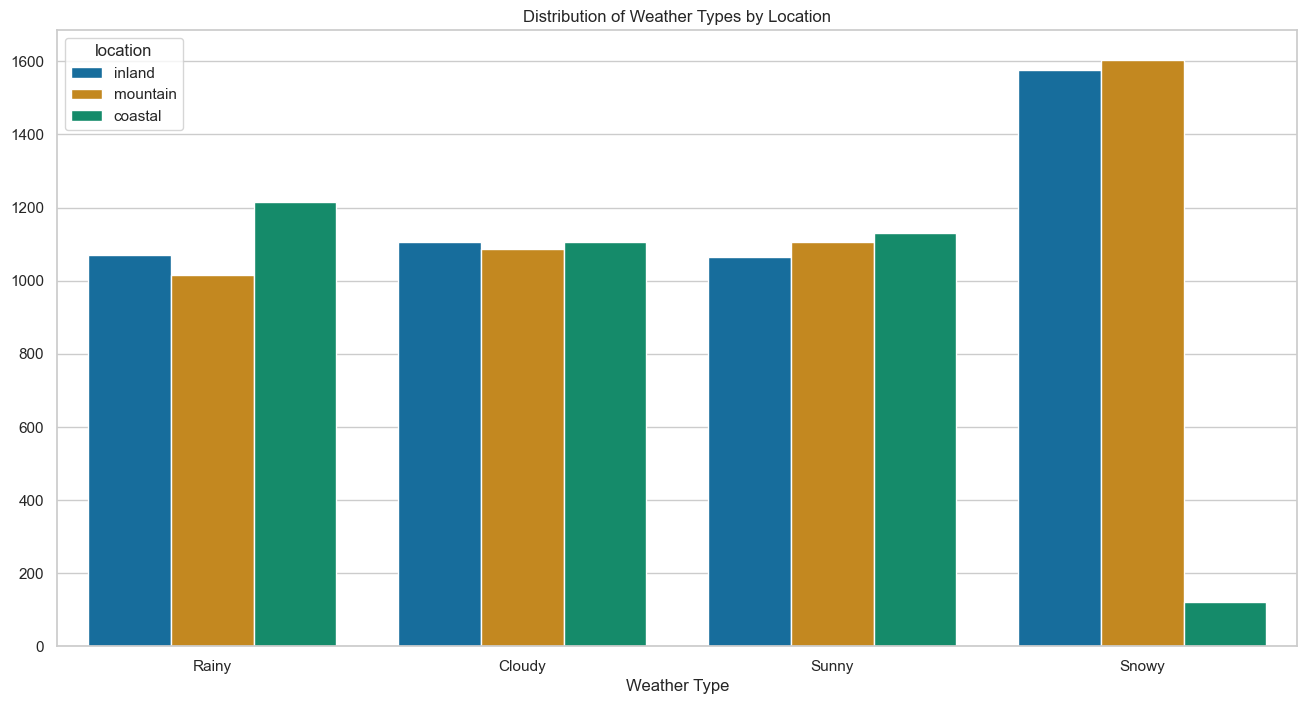

In [24]:
plt.figure(figsize=(16, 8))
sns.set(style = "whitegrid")
sns.countplot(x = "weather_type", hue = "location", data = df, palette="colorblind")
plt.ylabel('')
plt.xlabel('Weather Type')
plt.title('Distribution of Weather Types by Location')
plt.show()

__Insights :__

- Mountain Regions: With 1,605 number of snowy weather, mountain experience the highest frequency of snow. This makes them the prime target for selling medications for cold weather allergies, especially those that alleviate breathlessness.

- Inland Regions: Inland areas also have a significant number of snowy (1,575), indicating a strong market for these medications.

- Coastal Regions: Coastal areas have only 120 number of snowy weather. While the market is smaller, there may still be occasional demand, especially during unexpected cold snaps.

## Average Humidity by Location

__High humidity can exacerbate symptoms like nasal congestion and other respiratory conditions, while low humidity can cause throat irritation and dry nasal passages.__

In [25]:
df_group_avg_humidity = df.groupby('location')['humidity'].mean().reset_index()
df_group_avg_humidity

,location,humidity
0,coastal,65.320919
1,inland,70.235257
2,mountain,69.700603


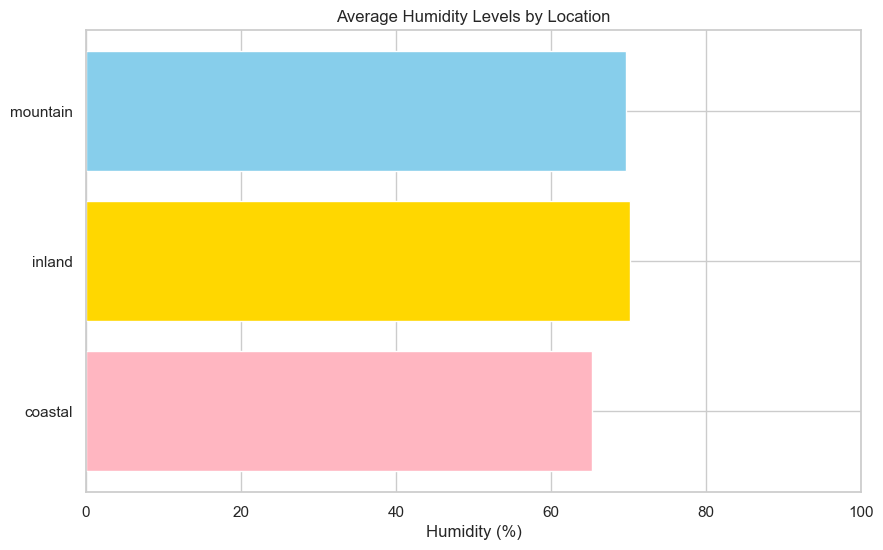

In [26]:
plt.figure(figsize=(10, 6))
plt.barh(df_group_avg_humidity['location'], df_group_avg_humidity['humidity'], color=['#FFB6C1', '#FFD700', '#87CEEB'])
plt.xlabel('Humidity (%)')
plt.title('Average Humidity Levels by Location')
plt.xlim(0, 100)
plt.show()

__Insights:__

For High Humidity Regions (Inland and Mountain): 

- Develop and promote medications that address respiratory symptoms exacerbated by high humidity, such as congestion and shortness of breath.

- consider offering combo packs that include both cold allergy medication and products that address humidity-related discomfort, like nasal sprays or humidifiers.

For Lower Humidity Regions (Coastal): 

- focus on medications that alleviate symptoms caused by dry air, such as dry skin.

## Average Temperature by Location

__Cold temperatures can make symptoms of cold weather allergies like runny nose, coughing, and difficulty breathing worse for people who are sensitive to them__

In [27]:
df_group_avg_temp = df.groupby('location')['temperature'].mean().reset_index()
df_group_avg_temp

,location,temperature
0,coastal,25.665640
1,inland,16.827243
2,mountain,16.578433


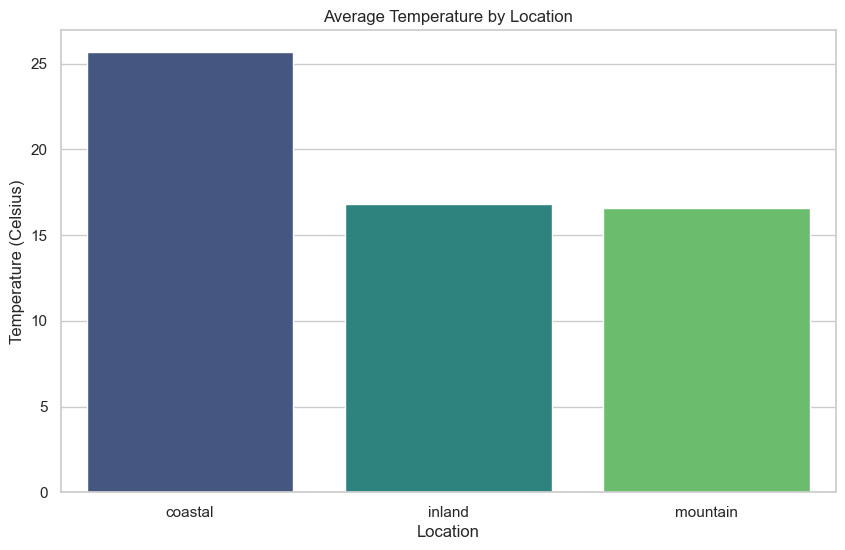

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='location', y='temperature', data=df_group_avg_temp, palette='viridis')
plt.xlabel('Location')
plt.ylabel('Temperature (Celsius)')
plt.title('Average Temperature by Location')
plt.show()

__Insight:__

- Inland and Mountain areas experience lower temperatures compared to coastal regions. Cold temperatures can exacerbate allergic reactions in susceptible individuals, leading to increased demand for cold allergy medications and related products.

# 5.  Feature Engineering

## Splitting Dataset

In [29]:
# Checking columns to select which column set as a target variable
df.columns

Index(['temperature', 'humidity', 'wind_speed', 'precipitation', 'cloud_cover',
       'atmospheric_pressure', 'uv_index', 'season', 'visibility', 'location',
       'weather_type', 'is_snowy'],
      dtype='object')

In [30]:
# assign into new variable, X and y
X = df.drop('is_snowy', axis=1)
y = df[['is_snowy']]

In [31]:
# Check datatypes in X dataset
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   temperature           13200 non-null  float64
 1   humidity              13200 non-null  int64  
 2   wind_speed            13200 non-null  float64
 3   precipitation         13200 non-null  float64
 4   cloud_cover           13200 non-null  object 
 5   atmospheric_pressure  13200 non-null  float64
 6   uv_index              13200 non-null  int64  
 7   season                13200 non-null  object 
 8   visibility            13200 non-null  float64
 9   location              13200 non-null  object 
 10  weather_type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


In [32]:
# Checking count of values in dataset on target variable (balance or not)
y.value_counts()

is_snowy
No          9900
Yes         3300
Name: count, dtype: int64

In [33]:
# assigning as imbalance data 
X_train_imbalanced, X_test, y_train_imbalanced, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
y_train_imbalanced.value_counts()

is_snowy
No          7941
Yes         2619
Name: count, dtype: int64

## Handling Outliers

In [34]:
# define function to display outliers numbers on histogram and boxplot 
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(16, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

temperature - Before Capping


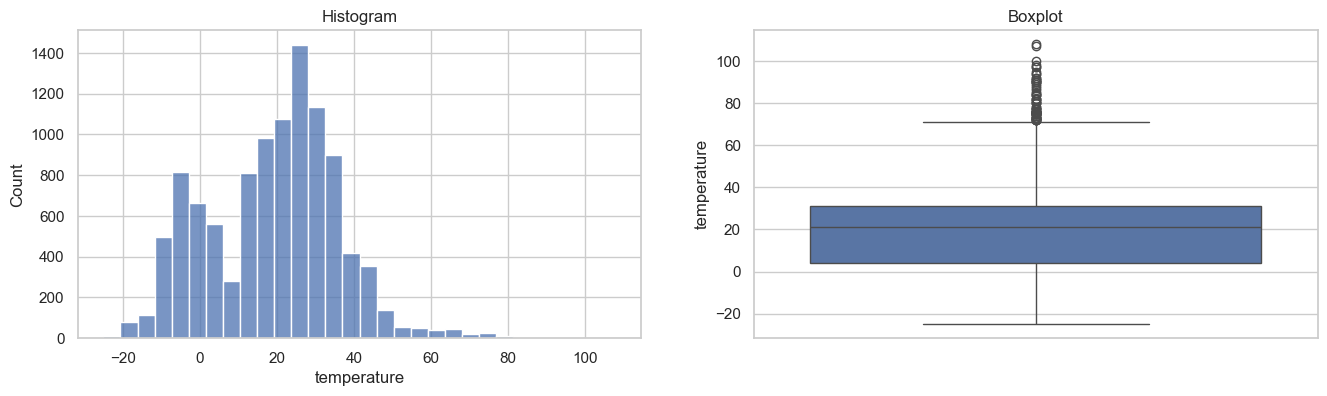

humidity - Before Capping


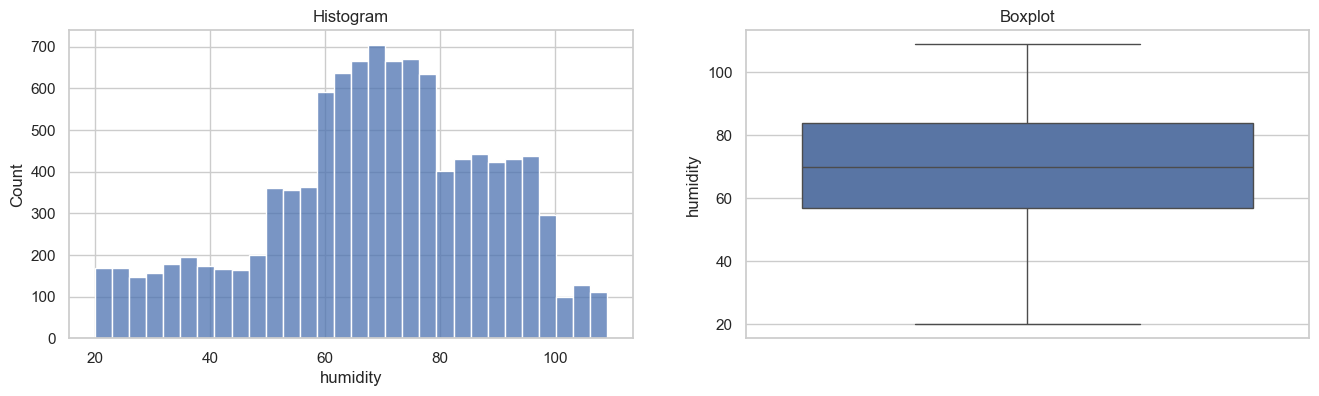

wind_speed - Before Capping


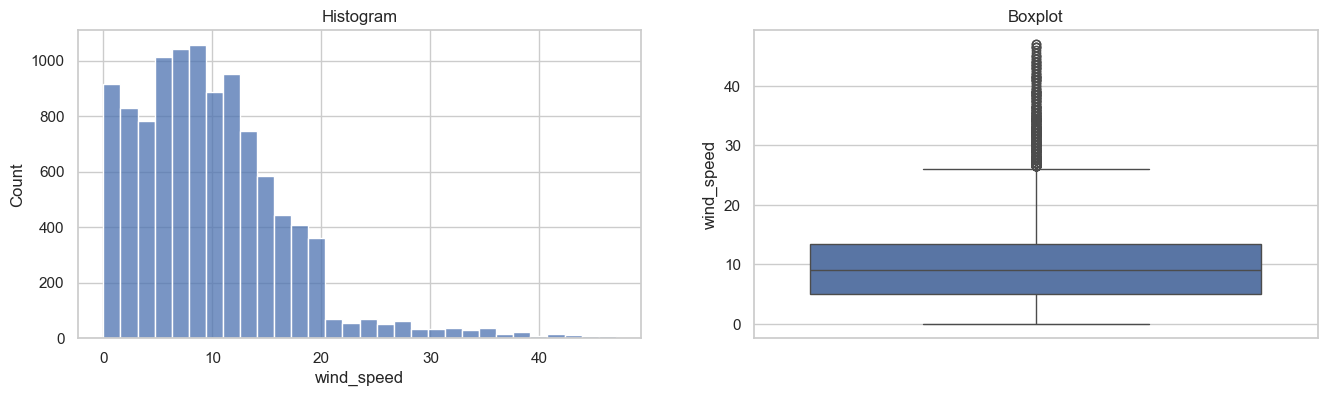

precipitation - Before Capping


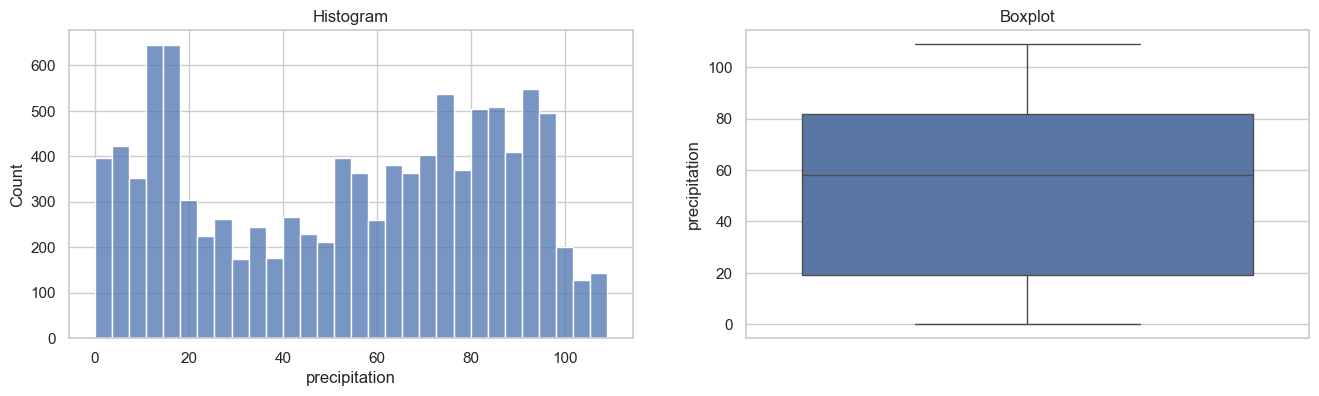

atmospheric_pressure - Before Capping


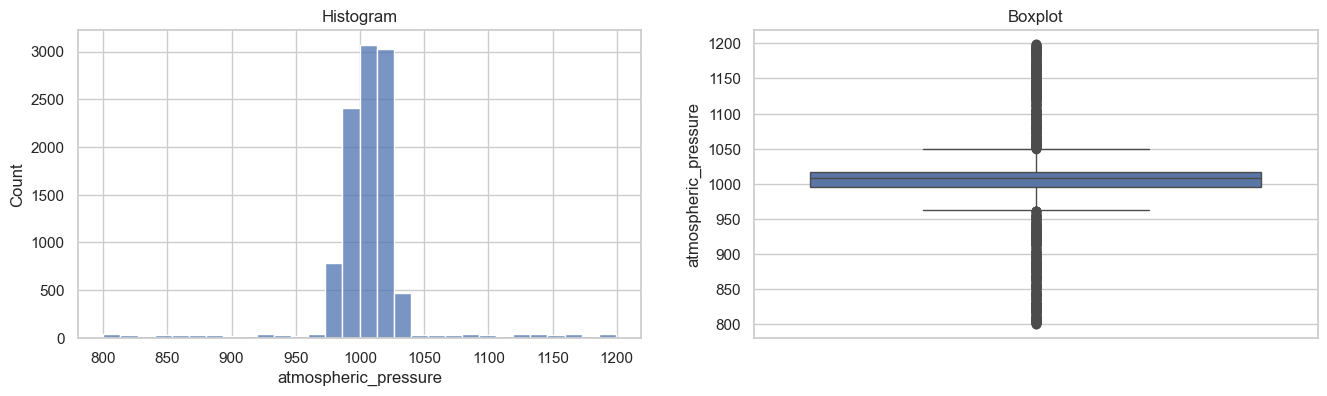

uv_index - Before Capping


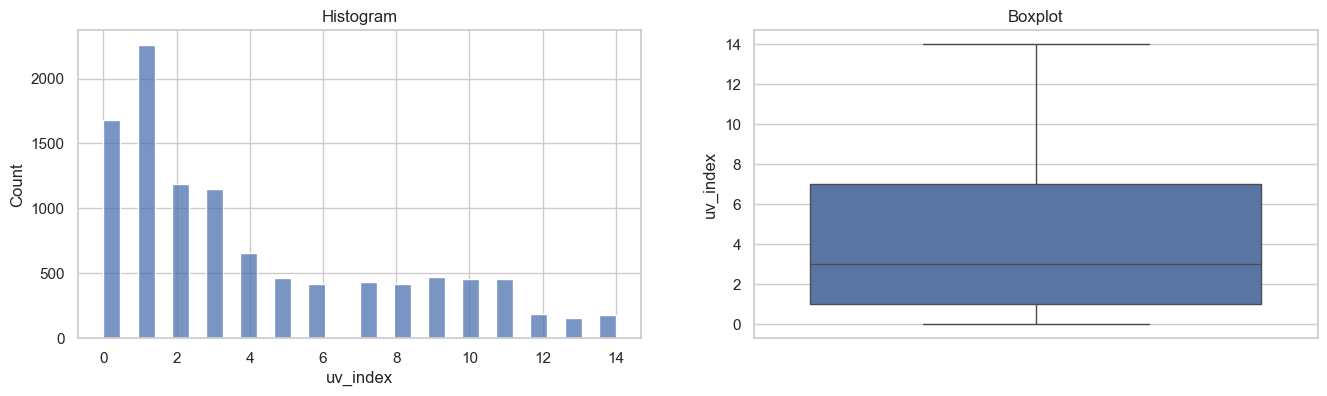

visibility - Before Capping


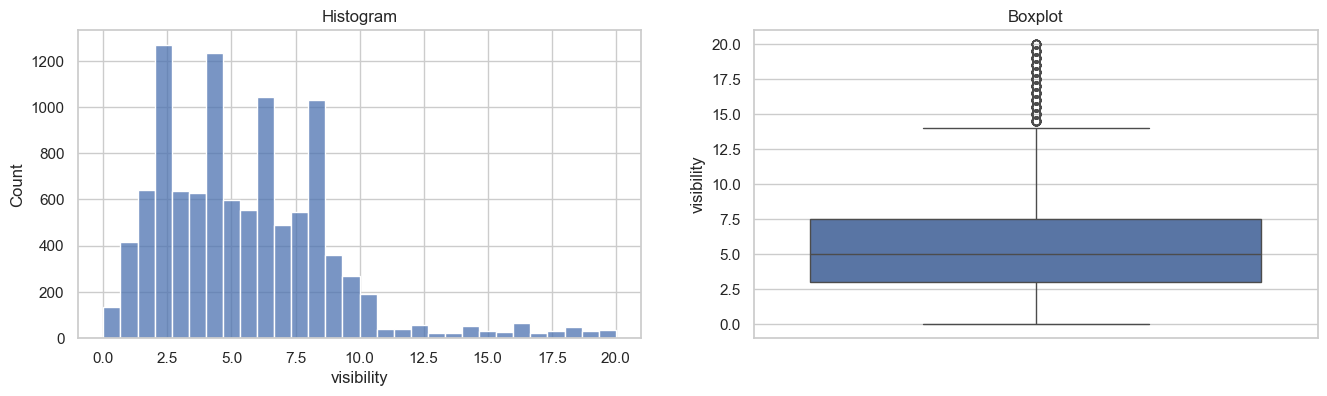

In [35]:
# checking outliers and extreme value the numerical feature with visualization
for column in X_train_imbalanced.select_dtypes(include=np.number):
    print(f'{column} - Before Capping')
    diagnostic_plots(X_train_imbalanced, column)

In [36]:
# Checking the skewness value of numerical feature
for column in X_train_imbalanced.select_dtypes(include=np.number):
    skewness = X_train_imbalanced[column].skew()
    print(f'Skewness value of {column}: {skewness}')

Skewness value of temperature: 0.19667167165293367
Skewness value of humidity: -0.4006340737406064
Skewness value of wind_speed: 1.3646363359649902
Skewness value of precipitation: -0.15303611772459252
Skewness value of atmospheric_pressure: -0.3124793832029572
Skewness value of uv_index: 0.9034961091101097
Skewness value of visibility: 1.2472014814873549


In [37]:
# capping the values in terms of retain all data 

for column in df.select_dtypes(include=np.number).columns.tolist():
    skewness = df[column].skew()
    if skewness > 1 or skewness < -1:
            q3 = df[column].quantile(0.75)
            q1 = df[column].quantile(0.25)
            iqr = q3 - q1 
            lower_bound = q1 - 3*iqr
            upper_bound = q3 + 3*iqr
    elif -0.5 <= skewness <= 0.5:
            lower_bound = df[column].mean() - 3 * df[column].std()
            upper_bound = df[column].mean() + 3 * df[column].std()
    else:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1
            lower_bound = q1 - 1.5 * iqr
            upper_bound = q3 + 1.5 * iqr
            
    outliers = df[column].loc[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers_percentage = len(outliers) / len(df) * 100
        
    print(f'Number of outliers in {column}: {len(outliers)}')
    print(f'Percentage of outliers: {outliers_percentage:.5f}%')
    
# Capping the value of the feature
    
    if outliers_percentage <= 5:
        if skewness > 1 or skewness < -1:
            winsorizered = Winsorizer(capping_method='iqr', tail='both', fold='auto', variables=[column])
            X_train_imbalanced[column] = winsorizered.fit_transform(df[[column]])
        elif -0.5 <= skewness <= 0.5:
            winsorizered = Winsorizer(capping_method='gaussian', tail='both', fold='auto', variables=[column])
            X_train_imbalanced[column] = winsorizered.fit_transform(df[[column]])
        else:
            winsorizered = Winsorizer(capping_method='iqr', tail='both', fold='auto', variables=[column])
            X_train_imbalanced[column] = winsorizered.fit_transform(df[[column]])

Number of outliers in temperature: 92
Percentage of outliers: 0.69697%
Number of outliers in humidity: 0
Percentage of outliers: 0.00000%
Number of outliers in wind_speed: 55
Percentage of outliers: 0.41667%
Number of outliers in precipitation: 0
Percentage of outliers: 0.00000%
Number of outliers in atmospheric_pressure: 556
Percentage of outliers: 4.21212%
Number of outliers in uv_index: 0
Percentage of outliers: 0.00000%
Number of outliers in visibility: 0
Percentage of outliers: 0.00000%


temperature After Capping


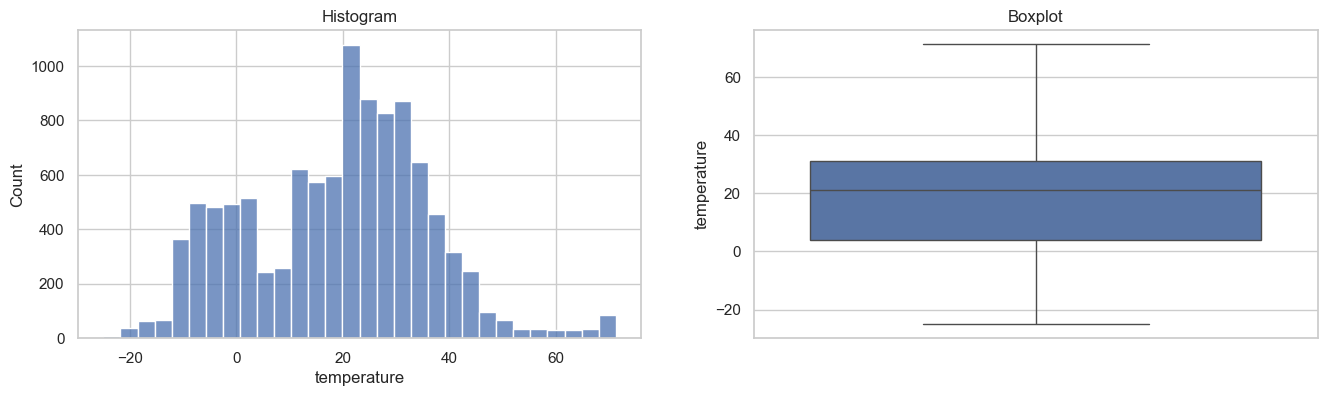

humidity After Capping


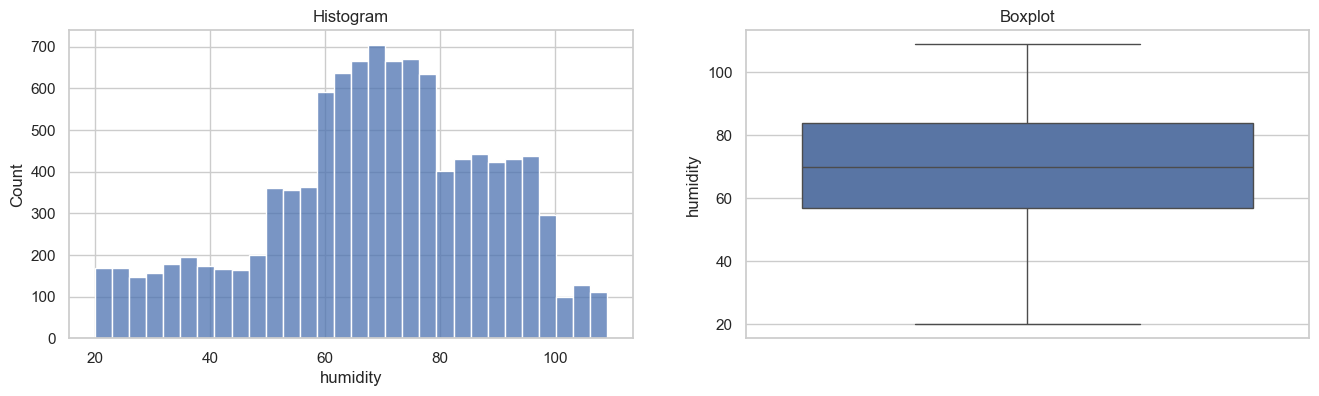

wind_speed After Capping


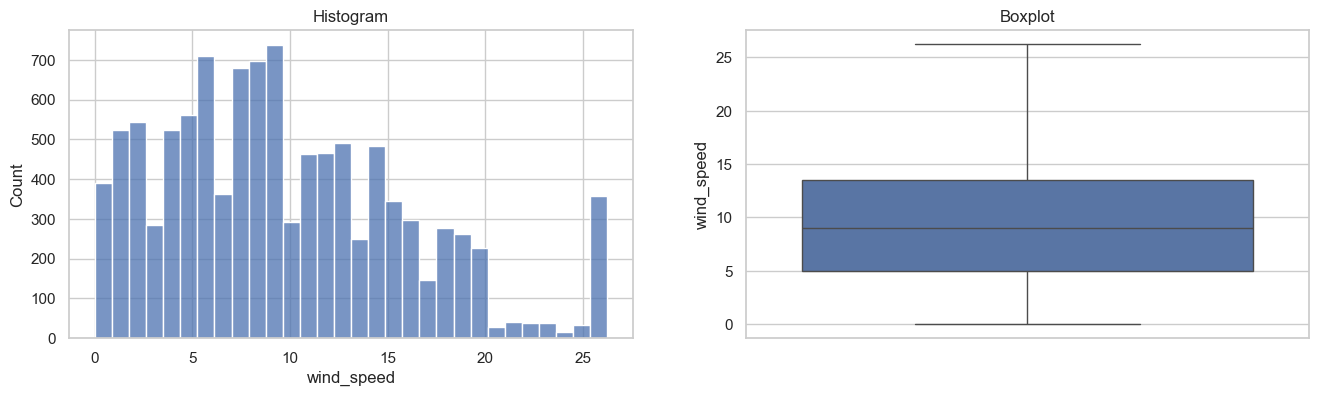

precipitation After Capping


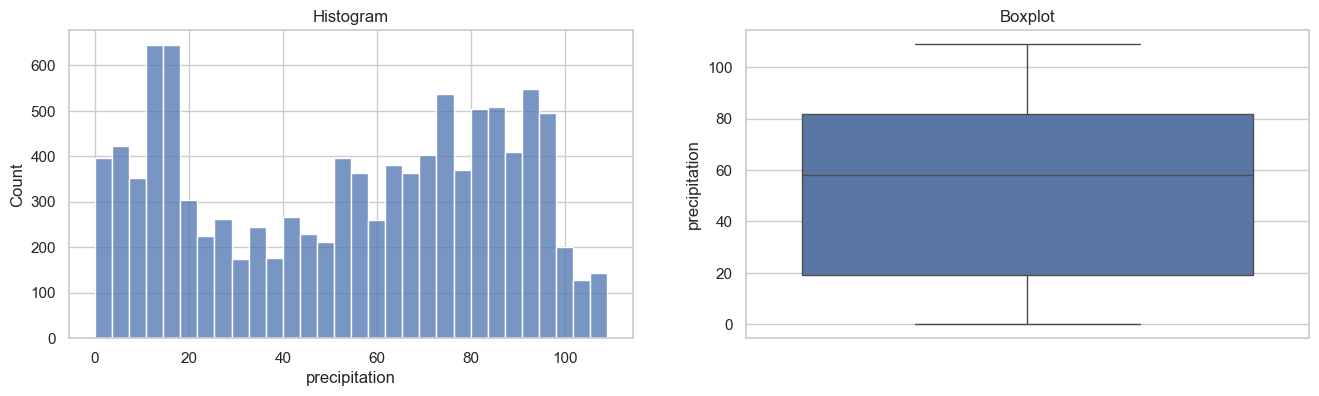

atmospheric_pressure After Capping


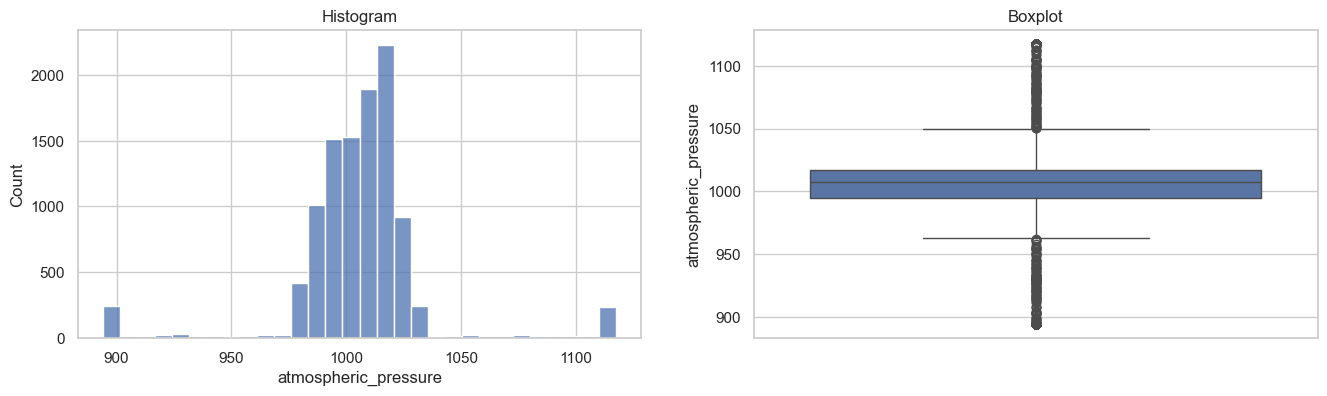

uv_index After Capping


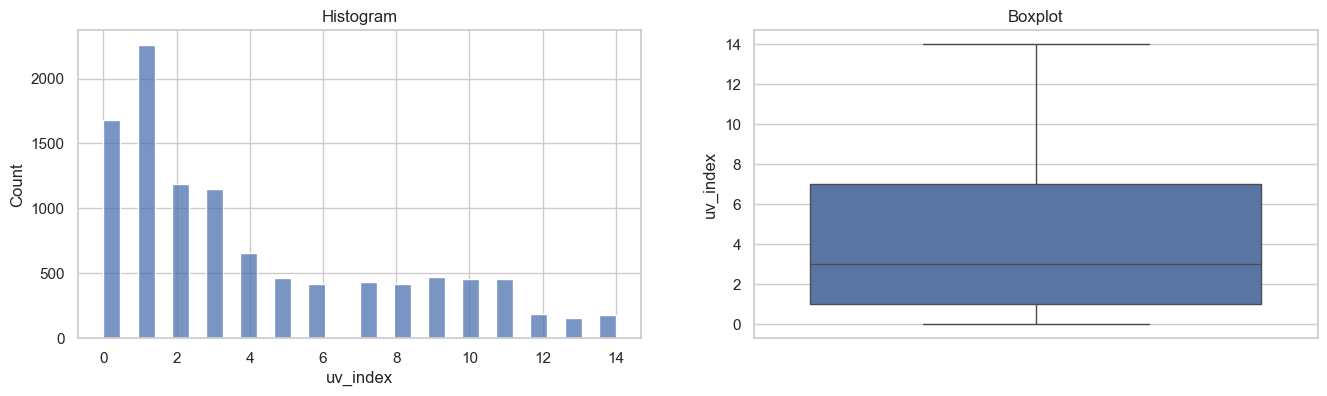

visibility After Capping


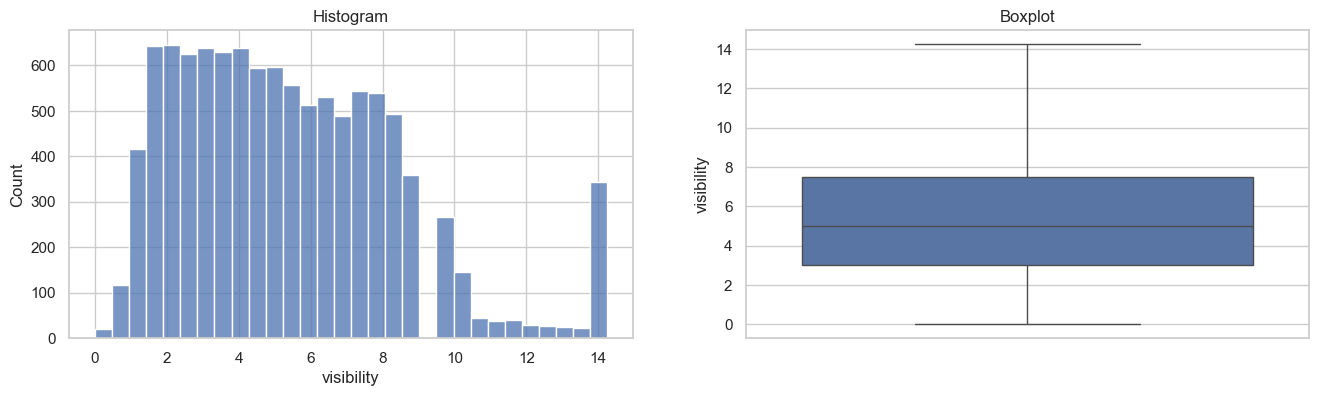

In [38]:
# Checking extreme values and outliers with visualization after capping
for column in X_train_imbalanced.select_dtypes(include=np.number):
    print(f'{column} After Capping')
    diagnostic_plots(X_train_imbalanced, column)

## Feature Selection

In [39]:
# assigining new variable temporary contains combination of dataset feature and target
X_train_temp = pd.concat([y_train_imbalanced, X_train_imbalanced], axis=1)
X_train_temp.columns

Index(['is_snowy', 'temperature', 'humidity', 'wind_speed', 'precipitation',
       'cloud_cover', 'atmospheric_pressure', 'uv_index', 'season',
       'visibility', 'location', 'weather_type'],
      dtype='object')

In [40]:
# checking correlation with phik library and display it sorted from highest to lowest
correlation_matrix = X_train_temp.phik_matrix()
print(correlation_matrix['is_snowy'].nlargest(23))

interval columns not set, guessing: ['temperature', 'humidity', 'wind_speed', 'precipitation', 'atmospheric_pressure', 'uv_index', 'visibility']


/Users/ardiansyahputra/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/ardiansyahputra/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/ardiansyahputra/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/ardiansyahputra/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


is_snowy                1.000000
weather_type            1.000000
temperature             0.973799
season                  0.803049
atmospheric_pressure    0.780294
uv_index                0.682319
visibility              0.592295
precipitation           0.553532
cloud_cover             0.527024
humidity                0.406549
location                0.183390
wind_speed              0.172622
Name: is_snowy, dtype: float64


__Analysis:__

- The correlation between the 'is_snowy' column and 'weather_type' is 1, indicating a perfect correlation. Therefore, it is decided to drop the 'weather_type' column

- Since there is no correlation with is_snowy column which under 0.1, retain feature exclude weather type and target value to become final columns.

In [41]:
# assigning a group of feature which utilize for training dataset into new variable
final_columns = correlation_matrix.index.tolist()
final_columns.remove('weather_type')
final_columns.remove('is_snowy')
print(f'Final column: {final_columns}')

Final column: ['temperature', 'humidity', 'wind_speed', 'precipitation', 'cloud_cover', 'atmospheric_pressure', 'uv_index', 'season', 'visibility', 'location']


In [42]:
# finalize selected feature
X_train_imbalanced = X_train_imbalanced[final_columns]
X_test = X_test[final_columns]
X_train_imbalanced

,temperature,humidity,wind_speed,precipitation,cloud_cover,atmospheric_pressure,uv_index,season,visibility,location
13145,33.0,69,6.50,31.0,overcast,1019.26,2,Summer,9.0,coastal
4745,18.0,63,14.50,98.0,overcast,1009.64,2,Autumn,1.5,mountain
3520,33.0,63,10.00,39.0,overcast,1003.66,4,Autumn,8.0,coastal
6608,27.0,80,10.00,84.0,partly cloudy,1008.88,13,Spring,10.0,coastal
12554,-8.0,72,7.00,77.0,overcast,990.53,0,Winter,3.0,inland
...,...,...,...,...,...,...,...,...,...,...
5478,30.0,72,18.50,72.0,overcast,999.10,0,Autumn,2.0,coastal
8548,-3.0,87,2.00,99.0,partly cloudy,993.03,1,Winter,4.0,mountain
13100,20.0,70,12.50,95.0,partly cloudy,1008.29,1,Winter,4.0,inland
6276,-4.0,101,26.25,76.0,overcast,988.50,3,Winter,0.0,mountain


### Splitting Numerical and Categorical Datatype

In [43]:
# splitting dataset into 2 dataset based on datatype of the value on each feature
cat_cols = X_train_imbalanced.select_dtypes(include='object').columns.tolist()
num_cols = X_train_imbalanced.select_dtypes(include=np.number).columns.tolist()
print(f'categorical columns: {cat_cols}')
print(f'numerical columns   : {num_cols}')

categorical columns: ['cloud_cover', 'season', 'location']
numerical columns   : ['temperature', 'humidity', 'wind_speed', 'precipitation', 'atmospheric_pressure', 'uv_index', 'visibility']


In [44]:
# assigning into new variable based on each columns
X_train_num = X_train_imbalanced[num_cols]
X_test_num = X_test[num_cols]

X_train_cat = X_train_imbalanced[cat_cols]
X_test_cat = X_test[cat_cols]

### Determine Scaler Method by Checking Statistics Information of Numerical Data

In [45]:
# Iteratting statistical informations numerical data type 
for column in num_cols:
    skewness_train = X_train_num[column].skew()
    min_train = X_train_num[column].min()
    max_train = X_train_num[column].max()
    range_train = X_train_num[column].max() - X_train_num[column].min()
    print(f'skewness value of feature {column}: {skewness_train}')

skewness value of feature temperature: 0.0529487521576633
skewness value of feature humidity: -0.4006340737406064
skewness value of feature wind_speed: 0.6816527916406563
skewness value of feature precipitation: -0.15303611772459252
skewness value of feature atmospheric_pressure: -0.06441662009242702
skewness value of feature uv_index: 0.9034961091101097
skewness value of feature visibility: 0.7365831929845685


__Analysis:__

Since the skewness value on each feature is below 1, it indicates that the values are normally distribution. So I determine to use StandardScaler in order to scale the numerical value in dataset.

### Handling Imbalance Data

In [46]:
# concat the splitted dataset based on datatype value in order to handling imbalance data
X_train_imbalanced_new = pd.DataFrame(data=X_train_cat, columns=cat_cols)
X_train_imbalanced_new = pd.concat([X_train_imbalanced_new, X_train_num], axis=1)
X_train_imbalanced_new

,cloud_cover,season,location,temperature,humidity,wind_speed,precipitation,atmospheric_pressure,uv_index,visibility
13145,overcast,Summer,coastal,33.0,69,6.50,31.0,1019.26,2,9.0
4745,overcast,Autumn,mountain,18.0,63,14.50,98.0,1009.64,2,1.5
3520,overcast,Autumn,coastal,33.0,63,10.00,39.0,1003.66,4,8.0
6608,partly cloudy,Spring,coastal,27.0,80,10.00,84.0,1008.88,13,10.0
12554,overcast,Winter,inland,-8.0,72,7.00,77.0,990.53,0,3.0
...,...,...,...,...,...,...,...,...,...,...
5478,overcast,Autumn,coastal,30.0,72,18.50,72.0,999.10,0,2.0
8548,partly cloudy,Winter,mountain,-3.0,87,2.00,99.0,993.03,1,4.0
13100,partly cloudy,Winter,inland,20.0,70,12.50,95.0,1008.29,1,4.0
6276,overcast,Winter,mountain,-4.0,101,26.25,76.0,988.50,3,0.0


In [47]:
# using library SMOTENC regarding handling imbalance data in dataset
smotenc = SMOTENC([0,1,2,3], random_state=22)

X_train, y_train = smotenc.fit_resample(X_train_imbalanced_new, y_train_imbalanced)
y_train.value_counts()

is_snowy
No          7941
Yes         7941
Name: count, dtype: int64

## Cardinality Check

In [48]:
# Checking cardinality on each categorical datatype weather they low cardinality or high cardinality (above 10 unique value)
for column in X_train_cat:
    print(f'{column}: {X_train_cat[column].unique()} ({X_train_cat[column].nunique()})')
    if X_train_cat[column].nunique() < 10:
        print(f'-- {column} column has low cardinality --\n')
    else:
        print(f'-- {column} column has high cardinality --\n')

cloud_cover: ['overcast' 'partly cloudy' 'clear' 'cloudy'] (4)
-- cloud_cover column has low cardinality --

season: ['Summer' 'Autumn' 'Spring' 'Winter'] (4)
-- season column has low cardinality --

location: ['coastal' 'mountain' 'inland'] (3)
-- location column has low cardinality --



## Preprocessing with Pipeline

In [49]:
# Using standardScaler due the distribution of the numerical value is normally distributed
scaler = StandardScaler()

# pipeline for scaler
numerical_pipe = Pipeline([
    ('impute', SimpleImputer(strategy='median')),
    ('scaler', scaler)
])

# Using OneHotEncoder due the categorical values are nominal datatype
ohe = OneHotEncoder(handle_unknown='ignore')

# pipeline for nominal encoder
categorical_pipe = Pipeline([
    ('impute_nom', SimpleImputer(strategy='most_frequent')),
    ('ohe',ohe)
    ])

# make a pipeline for preprocessing data
preprocessing = ColumnTransformer([
    ('numerical', numerical_pipe, num_cols), 
    ('nominal', categorical_pipe, cat_cols)
], remainder='drop')

In [50]:
# display the processed data with pipeline on dataframe 
pd.DataFrame(preprocessing.fit_transform(X_train), columns= preprocessing.get_feature_names_out())

,numerical__temperature,numerical__humidity,numerical__wind_speed,numerical__precipitation,numerical__atmospheric_pressure,numerical__uv_index,numerical__visibility,nominal__cloud_cover_clear,nominal__cloud_cover_cloudy,nominal__cloud_cover_overcast,nominal__cloud_cover_partly cloudy,nominal__season_Autumn,nominal__season_Spring,nominal__season_Summer,nominal__season_Winter,nominal__location_coastal,nominal__location_inland,nominal__location_mountain
0,1.179326,-0.148089,-0.556297,-1.002645,0.611471,-0.315043,1.389136,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,0.330499,-0.458646,0.706492,1.254908,0.287996,-0.315043,-1.074013,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.179326,-0.458646,-0.003827,-0.733086,0.086916,0.209929,1.060716,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.839795,0.421265,-0.003827,0.783181,0.262440,2.572305,1.717556,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-1.140802,0.007189,-0.477373,0.547317,-0.354584,-0.840015,-0.581383,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15877,-0.857859,0.421265,1.481682,0.481427,-0.490056,-0.840015,-0.734628,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
15878,-0.688094,0.058949,-1.001830,0.992595,-0.254911,-0.840015,-0.581383,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
15879,-0.574917,1.301177,0.853656,1.100903,-0.428715,-0.577529,-0.229777,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
15880,-0.348563,-2.166709,-0.958520,1.175784,-0.119419,1.784847,2.931479,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### Encode Label

In [51]:
# encode label in order to make the target as numerical datatype
encoder = LabelEncoder()
encoder.fit(y_train)

y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)

In [52]:
# display classes (encoded value)
encoder.classes_

array(['No', 'Yes'], dtype=object)

### Cross Validation Classifier

In [53]:
# creating pipeline for the models
pipe_log = make_pipeline(preprocessing, LogisticRegression())
pipe_knn = make_pipeline(preprocessing, KNeighborsClassifier())
pipe_svc = make_pipeline(preprocessing, SVC())
pipe_dt = make_pipeline(preprocessing, DecisionTreeClassifier(random_state=22))
pipe_rf = make_pipeline(preprocessing, RandomForestClassifier(random_state=22))
pipe_xgb = make_pipeline(preprocessing, XGBClassifier())

__Insight:__

Since the dataset is already balanced, using accuracy as a metric for predicting weather types is useful for providing a simple and general indication of model performance. The consequences of misclassification may be relatively uniform across classes. For example, if predicting a specific type of weather snowy is not more critical than predicting another type not snowy, accuracy might suffice as a primary metric.

In [54]:
# conducting corss validation in order to find which model (classifier most suitable for classifying the result)

cv_dt = cross_val_score(pipe_dt, X_train, y_train_encoded, cv=5, scoring='accuracy', n_jobs=-1)
cv_rf = cross_val_score(pipe_rf, X_train, y_train_encoded, cv=5, scoring='accuracy', n_jobs=-1)
cv_log = cross_val_score(pipe_log, X_train, y_train_encoded, cv=5, scoring='accuracy', n_jobs=-1)
cv_knn = cross_val_score(pipe_knn, X_train, y_train_encoded, cv=5, scoring='accuracy', n_jobs=-1)
cv_svc = cross_val_score(pipe_svc, X_train, y_train_encoded, cv=5, scoring='accuracy', n_jobs=-1)
cv_xgb = cross_val_score(pipe_xgb, X_train, y_train_encoded, cv=5, scoring='accuracy', n_jobs=-1)

In [55]:
# itteration to find the best model based on metric accuracy 
model_name = []
cv_score = 0
for cv, name in zip([cv_dt, cv_rf, cv_svc, cv_knn, cv_log, cv_xgb],
                    ['Decision Tree','Random Forest', 'Support Vector Machine', 'K-Nearest Neighbors','Logistic Regression', 'XGBoost']):
    print(name)
    print(f'Accuracy - All - Cross Validation: {cv}')
    print(f'Accuracy - mean - Cross Validation: {cv.mean()}')
    print(f'Accuracy - std - Cross Validation: {cv.std()}')
    print(f'Accuracy - range - Cross Validation: {cv.mean()-cv.std()} - {cv.mean()+cv.std()}')
    print('-'*50)

    if cv_score < cv.mean():
        cv_score = cv.mean()
        model_name = name
    else:
      pass

print(f'Cross Val mean from best model: {cv_score}')
print(f'Best Model: {model_name}')


Decision Tree
Accuracy - All - Cross Validation: [0.95687756 0.96789424 0.96945844 0.96693955 0.96442065]
Accuracy - mean - Cross Validation: 0.9651180874183065
Accuracy - std - Cross Validation: 0.004432970288368609
Accuracy - range - Cross Validation: 0.9606851171299379 - 0.9695510577066752
--------------------------------------------------
Random Forest
Accuracy - All - Cross Validation: [0.96285804 0.97639282 0.97984887 0.97984887 0.98079345]
Accuracy - mean - Cross Validation: 0.9759484098951136
Accuracy - std - Cross Validation: 0.006715009693800764
Accuracy - range - Cross Validation: 0.9692334002013128 - 0.9826634195889143
--------------------------------------------------
Support Vector Machine
Accuracy - All - Cross Validation: [0.95624803 0.9707271  0.97575567 0.96851385 0.97008816]
Accuracy - mean - Cross Validation: 0.9682665632787296
Accuracy - std - Cross Validation: 0.006480206421044038
Accuracy - range - Cross Validation: 0.9617863568576855 - 0.9747467696997737
-------

# 6. Model Definition

In [56]:
# define selected classifier for classifying the target value
pipe_rf

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['temperature', 'humidity',
                                                   'wind_speed',
                                                   'precipitation',
                                                   'atmospheric_pressure',
                                                   'uv_index', 'visibility']),
                                                 ('nominal',
                                                  Pipeline(steps=[('impute_nom',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cloud_cover', 'season',
                                                   'location'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=22))])

__Insights:__

- Random Forest is an ensemble learning method that combines multiple decision trees to create a "forest." Each tree in the forest is trained on a random subset of the data and features, which helps to average out biases and reduce the variance, leading to better generalization.

- By averaging the results of multiple trees, Random Forests are less likely to overfit to the training data compared to individual decision trees

- Random Forests tend to achieve high accuracy and performance on a wide range of classification tasks. They are particularly effective in capturing complex patterns in the data due to their ensemble nature.

# 7. Model Training

In [57]:
# convert train and test dataset into selected classifier 
pipe_rf.fit(X_train, y_train_encoded)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['temperature', 'humidity',
                                                   'wind_speed',
                                                   'precipitation',
                                                   'atmospheric_pressure',
                                                   'uv_index', 'visibility']),
                                                 ('nominal',
                                                  Pipeline(steps=[('impute_nom',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['cloud_cover', 'season',
                                                   'location'])])),
                ('randomforestclassifier',
                 RandomForestClassifier(random_state=22))])

# 8. Model Evaluation

In [58]:
# assign the prediction of trained dataset into new variable
y_pred_train = pipe_rf.predict(X_train)
y_pred_train

array([0, 0, 0, ..., 1, 1, 1])

In [59]:
# assigning prediction of test dataset into new variable
y_pred_test = pipe_rf.predict(X_test)
y_pred_test

array([1, 0, 0, ..., 1, 0, 0])

In [60]:
# create value of confussion matrix
matrix = confusion_matrix(y_test_encoded, y_pred_test)
matrix

array([[1925,   34],
       [  43,  638]])

Accuracy - Train Set  :  1.0 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      7941
           1       1.00      1.00      1.00      7941

    accuracy                           1.00     15882
   macro avg       1.00      1.00      1.00     15882
weighted avg       1.00      1.00      1.00     15882
 

Confusion Matrix      : 


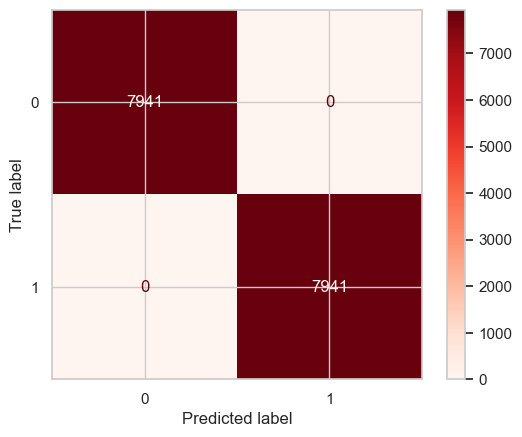

In [61]:
print('Accuracy - Train Set  : ', accuracy_score(y_train_encoded, y_pred_train), '\n')
print('Classification Report : \n', classification_report(y_train_encoded, y_pred_train), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_rf, X_train, y_train_encoded, cmap='Reds'))

Accuracy - Test Set  :  0.9708333333333333 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1959
           1       0.95      0.94      0.94       681

    accuracy                           0.97      2640
   macro avg       0.96      0.96      0.96      2640
weighted avg       0.97      0.97      0.97      2640
 

Confusion Matrix      : 


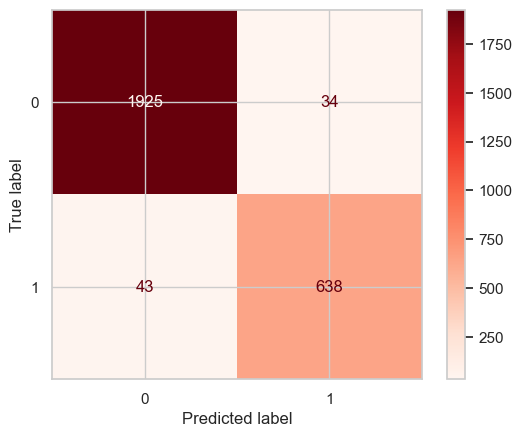

In [62]:
print('Accuracy - Test Set  : ', accuracy_score(y_test_encoded, y_pred_test), '\n')
print('Classification Report : \n', classification_report(y_test_encoded, y_pred_test), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_rf, X_test, y_test_encoded, cmap='Reds'))

In [63]:
# generate new function in order to display the comparisson of using default hyperparameter and tunned the hyperparamter
all_reports = {}

def performance_report(all_reports, y_train, y_pred_train, y_test, y_pred_test, name):
    score_reports = {
        'train - accuracy': accuracy_score(y_train, y_pred_train),
        'test - accuracy': accuracy_score(y_test, y_pred_test),
    }
    all_reports[name] = score_reports
    return all_reports

In [64]:
# display the result
all_reports = performance_report(all_reports, y_train_encoded, y_pred_train, y_test_encoded, y_pred_test, 'Baseline (Default Hyperparameter)')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter)
train - accuracy,1.000000
test - accuracy,0.970833


__Insight:__

The high accuracy (97.08%) for both classes suggest that the model performs well. Assuming the training set metrics are similar to the test set metrics, the model appears to be a good fit.

## Hyperparameters Tuning

In [65]:
# Define Hyperparameters
n_estimators = [85, 90, 95]
max_depth = [17, 18, 19]
min_samples_split = [10, 5, 3]
min_samples_leaf = [2, 3, 4]

param_grid_rf = {
    'randomforestclassifier__n_estimators': n_estimators,
    'randomforestclassifier__max_depth': max_depth,
    'randomforestclassifier__min_samples_split': min_samples_split,
    'randomforestclassifier__min_samples_leaf': min_samples_leaf,
}

param_grid_rf

{'randomforestclassifier__n_estimators': [85, 90, 95],
 'randomforestclassifier__max_depth': [17, 18, 19],
 'randomforestclassifier__min_samples_split': [10, 5, 3],
 'randomforestclassifier__min_samples_leaf': [2, 3, 4]}

In [66]:
# training the data with selected param
clf_grid_rf = GridSearchCV(estimator=pipe_rf, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)

In [67]:
# finding the best option hyperparameters with grid search (training one at a time on each defined hyperparameters)
clf_grid_rf.fit(X_train, y_train_encoded)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=85; total time=   4.8s
[CV] END randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=85; total time=   4.8s
[CV] END randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=85; total time=   5.1s
[CV] END randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestclassifier__n_estimators=85; total time=   5.1s
[CV] END randomforestclassifier__max_depth=17, randomforestclassifier__min_samples_leaf=2, randomforestclassifier__min_samples_split=10, randomforestc

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('numerical',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['temperature',
                                                                          'humidity',
                                                                          'wind_speed',
                                                                          'precipitation',
                                                                          'atmospheric_pressure',
                                                                          'uv_index',
                                                                          'visibility']),
                                                                        ('nominal',
                                                                         Pipeline(steps=[('impute_nom',
                                                                                          Simpl...
                                                                         ['cloud_cover',
                                                                          'season',
                                                                          'location'])])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(random_state=22))]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [17, 18, 19],
                         'randomforestclassifier__min_samples_leaf': [2, 3, 4],
                         'randomforestclassifier__min_samples_split': [10, 5,
                                                                       3],
                         'randomforestclassifier__n_estimators': [85, 90, 95]},
             scoring='accuracy', verbose=2)

In [68]:
# display best hyperparameter
clf_grid_rf.best_params_

{'randomforestclassifier__max_depth': 19,
 'randomforestclassifier__min_samples_leaf': 2,
 'randomforestclassifier__min_samples_split': 5,
 'randomforestclassifier__n_estimators': 85}

In [69]:
# assign best estimator into new variable
rf_grid_best = clf_grid_rf.best_estimator_

In [70]:
best_result = pd.DataFrame(clf_grid_rf.cv_results_)
best_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_randomforestclassifier__max_depth,param_randomforestclassifier__min_samples_leaf,param_randomforestclassifier__min_samples_split,param_randomforestclassifier__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,4.356266,1.073001,0.072045,0.015034,17,2,10,85,"{'randomforestclassifier__max_depth': 17, 'ran...",0.956248,0.974819,0.977960,0.975441,0.981423,0.973178,0.008778,67
1,2.540045,0.233161,0.072339,0.011867,17,2,10,90,"{'randomforestclassifier__max_depth': 17, 'ran...",0.956563,0.974504,0.979219,0.975756,0.981108,0.973430,0.008758,57
2,2.622523,0.356962,0.069154,0.004860,17,2,10,95,"{'randomforestclassifier__max_depth': 17, 'ran...",0.956248,0.974819,0.978275,0.975441,0.981108,0.973178,0.008756,67
3,2.831018,0.317113,0.074234,0.014662,17,2,5,85,"{'randomforestclassifier__max_depth': 17, 'ran...",0.961914,0.977022,0.980164,0.977015,0.981108,0.975445,0.006963,2
4,2.398123,0.155462,0.067089,0.006191,17,2,5,90,"{'randomforestclassifier__max_depth': 17, 'ran...",0.961284,0.975763,0.980479,0.976071,0.980793,0.974878,0.007118,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,2.879910,0.211161,0.111184,0.083643,19,4,5,90,"{'randomforestclassifier__max_depth': 19, 'ran...",0.958451,0.975449,0.979849,0.976385,0.978589,0.973745,0.007804,42
77,2.545341,0.090370,0.068787,0.010078,19,4,5,95,"{'randomforestclassifier__max_depth': 19, 'ran...",0.958766,0.974504,0.980164,0.975126,0.978589,0.973430,0.007629,61
78,2.197781,0.216192,0.067502,0.003941,19,4,3,85,"{'randomforestclassifier__max_depth': 19, 'ran...",0.958451,0.975763,0.980479,0.974811,0.979219,0.973745,0.007930,44
79,2.619209,0.319702,0.123821,0.100514,19,4,3,90,"{'randomforestclassifier__max_depth': 19, 'ran...",0.958451,0.975449,0.979849,0.976385,0.978589,0.973745,0.007804,42


Accuracy - Test Set  :  0.9712121212121212 

Classification Report : 
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1959
           1       0.95      0.94      0.94       681

    accuracy                           0.97      2640
   macro avg       0.96      0.96      0.96      2640
weighted avg       0.97      0.97      0.97      2640
 

Confusion Matrix      : 


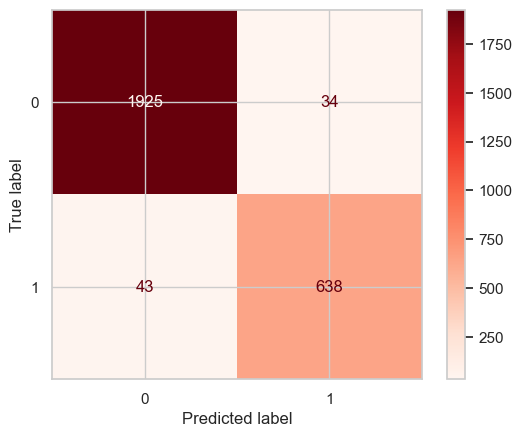

In [71]:
# Check Performance Model against Test-Set
y_pred_train_grid = rf_grid_best.predict(X_train)
y_pred_test_grid = rf_grid_best.predict(X_test)


print('Accuracy - Test Set  : ', accuracy_score(y_test_encoded, y_pred_test_grid), '\n')
print('Classification Report : \n', classification_report(y_test_encoded, y_pred_test_grid), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_rf, X_test, y_test_encoded, cmap='Reds'))

In [72]:
# display the comparisson
all_reports = performance_report(all_reports, y_train_encoded, y_pred_train_grid, y_test_encoded, y_pred_test_grid, 'Grid Search')
pd.DataFrame(all_reports)

,Baseline (Default Hyperparameter),Grid Search
train - accuracy,1.000000,0.998930
test - accuracy,0.970833,0.971212


__Analysis Model:__

- The accuracy has increased very slightly by 0.0004 (0.04%), indicating a marginal improvement in the model's overall performance.

- Strengths and Weaknesses the Classifier:

In [73]:
evaluation = X_test.copy(deep=True)
evaluation['label'] = y_test_encoded
evaluation['prediction'] = y_pred_test_grid

fn = evaluation[(evaluation['label'] == 1) &(evaluation['prediction'] == 0)]
fp = evaluation[(evaluation['label'] == 0) &(evaluation['prediction'] == 1)]
tn = evaluation[(evaluation['label'] == 0) &(evaluation['prediction'] == 0)]
tp = evaluation[(evaluation['label'] == 1) &(evaluation['prediction'] == 1)]

In [74]:
fn[['temperature', 'humidity']].describe()

,temperature,humidity
count,43.000000,43.000000
mean,16.255814,49.186047
std,19.108827,16.391426
min,-20.000000,21.000000
25%,-1.000000,38.000000
50%,18.000000,48.000000
75%,33.500000,64.000000
max,48.000000,78.000000


- The mean temperature of 16.26 C shows that the model missed some colder temperatures, which should have been classified as cold weather.

- The humidity level is slightly higher than the false positives at 49.19%.

In [75]:
fp[['temperature', 'humidity']].describe()

,temperature,humidity
count,33.000000,33.000000
mean,22.181818,45.636364
std,16.438245,17.345421
min,-7.000000,21.000000
25%,10.000000,36.000000
50%,25.000000,40.000000
75%,34.000000,61.000000
max,47.000000,76.000000


- The mean temperature of 22.18 C indicates that the model mistakenly classified some warmer temperatures as cold weather.

In [76]:
tn[['temperature', 'humidity']].describe()

,temperature,humidity
count,1926.000000,1926.000000
mean,26.705607,65.442368
std,13.595073,20.503976
min,-20.000000,20.000000
25%,19.000000,53.000000
50%,26.000000,66.000000
75%,33.000000,79.000000
max,109.000000,109.000000


- The mean temperature of 26.71 C and the higher standard deviation indicate a broader range of warmer temperatures correctly identified.

In [77]:
tp[['temperature', 'humidity']].describe()

,temperature,humidity
count,638.000000,638.000000
mean,-3.064263,80.663009
std,5.784509,12.991033
min,-24.000000,20.000000
25%,-7.000000,71.000000
50%,-3.000000,82.000000
75%,1.000000,91.000000
max,38.000000,108.000000


- The mean temperature of -3.06C shows that the model correctly identified cold weather for temperatures well below freezing.

- The high mean humidity of 80.66% suggests that the model correctly associates higher humidity with cold weather conditions.

# 9. Model Saving

In [78]:
# export best estimator in order to conduct inference
with open('./deployment/model_rf.pkl', 'wb') as file_1:
  pickle.dump(rf_grid_best, file_1)

# 10. Conclusion

## EDA Conclusion

Based on the analysis, it is recommended to target the sale of cold allergy medications primarily in mountain and inland areas during the winter season. The data shows that mountain areas experience the highest frequency of snowy weather, making them the prime target for selling medications for cold weather allergies, particularly those that alleviate breathlessness. Inland areas also have a significant number of snowy days, indicating a strong market for these medications. Coastal areas, with fewer snowy days, may still have occasional demand, especially during unexpected cold snaps. Winter has the lowest average atmospheric pressure, often associated with colder weather and snowfall. This underscores the importance of having effective cold allergy medications available to address symptoms such as runny nose, cough, and shortness of breath, which often worsen during winter. The imbalance in data distribution for snowy and not snowy areas could affect the accuracy of weather classification, potentially leading to misclassification.

In summary, focusing on mountain and inland areas during winter will likely maximize the impact of cold allergy medication sales. By addressing both respiratory and skin-related symptoms and being mindful of weather-induced variations, businesses can better meet the needs of individuals suffering from cold weather allergies.

## Business Recommendations Based on Analysis

Targeted Marketing by Location:

- Mountain: Focus on these areas as they experience the highest frequency of snowy weather, making them the prime target for cold allergy medications. Emphasize products that alleviate breathlessness and other severe allergic reactions.

- Inland: Similar to mountain ares, inland areas have a significant number of snowy days, indicating a strong market for cold allergy medications. Ensure ample stock and targeted marketing in these ares.

- Coastal: While the demand might be lower due to fewer snowy days, there can still be occasional spikes in demand during unexpected cold snaps. Maintain a smaller but responsive inventory to cater to these needs.

Seasonal Sales Strategies:

- Winter Season: Prioritize the distribution and marketing of cold allergy medications during winter, as this season has the lowest average atmospheric pressure, leading to colder weather and increased likelihood of snowfall. Highlight the effectiveness of medications in alleviating symptoms such as runny nose, cough, and shortness of breath.

Product Development and Bundling:

- High Humidity Regions (Inland and Mountain): Develop and promote medications that address respiratory symptoms exacerbated by high humidity, such as congestion and shortness of breath. Consider offering combo packs that include both cold allergy medications and products addressing humidity-related discomfort.

## Model Conclusion

Conducting cross-validation to find the most suitable model for classifying weather types is essential. Given that the dataset is balanced, using accuracy as a metric is appropriate as it provides a simple and general indication of model performance. Misclassification consequences appear to be uniform across classes, making accuracy a reliable metric for this task. Random Forest, being an ensemble learning method, effectively combines multiple decision trees to reduce bias and variance, leading to better generalization and high accuracy.

After training the dataset, the Random Forest model achieved a high accuracy of 97.08%, indicating good fit model (has good performance). Post-tuning, the accuracy slightly improved by 0.04%, the consistency of the metrics between the original and new test sets, along with the high accuracy indicate that the model is a **Good Fit**.

**Strengths:**

- High Accuracy: The model's high accuracy (97.08%) indicates it performs well in predicting weather types.

- Balanced Performance: The model shows consistent performance across both classes, with minimal performance drop post-tuning.

**Weaknesses:**

- False Negatives: The model missed some colder temperatures (mean = 16.26 C) that should have been classified as cold weather. This indicates room for improvement in identifying cold weather conditions.

- False Positives: The model mistakenly classified some warmer temperatures (mean = 22.18 C) as cold weather, suggesting the need for better differentiation between cold and warm weather conditions.

**Recommendations for Improvement:**

- Feature Engineering: Introduce additional features that may help the model better differentiate between cold and warm weather conditions.

- Parameter Tuning: Further optimize the hyperparameters of the Random Forest model to enhance its performance.


By addressing those things, the model's accuracy in predicting cold weather conditions can be further improved, leading to better-targeted marketing strategies for selling cold allergy medications. This will ensure that the right products reach the right customers at the right time, enhancing customer satisfaction and business success.

# 11. Conceptual Problems

1. Bagging merupakan singkatan dari Bootstrap AGGregating, menggabungkan Bootstrapping dan Aggregation untuk membentuk satu model ensemble. Bootstrapping dapat dikatakan pengambilan sample data dengan penggantian untuk membuat beberapa subset data yang digunakan dalam pelatihan. Dalam bagging, subset-subset ini digunakan untuk melatih beberapa model secara independen. Setiap model membuat prediksi, dan prediksi-prediksi ini digabungkan—dengan cara rata-rata (regression) atau mayoritas voting untuk tugas (classification) sebagai hasil prediksi akhir. Bagging membantu meningkatkan akurasi prediksi dan mengurangi overfitting dengan memanfaatkan subset-subset data yang beragam (pada training data)

2. - Random Forest adalah contoh dari algoritma bagging, di mana setiap model independen adalah Decision Tree. Prediksi akhir (output) diambil dengan cara voting atau averaging dari prediksi decision tree itu sendiri.

    - XGBoost itu sendiri merupakan classifier yang menggunakan pendekatan boosting, di mana setiap tree dibangun secara berurutan, dengan setiap tree melakukan improvement terhadap false prediction dari tree sebelumnya.

3. Cross Validation merupakan sebuah cara dalam develop machine learning untuk mengevaluasi kinerja model prediktif, menentukan classifier mana yang cocok berdasarkan datasetnya, dengan cara membagi data menjadi subset yang lebih kecil, kemudian melakukan proses training dan validasi secara berulang menggunakan subset tersebut.